In [193]:
import pandas 
import matplotlib.pyplot as plt
import numpy as np


def read():
    dataframe_train=pandas.read_csv('mnist_train.csv')
    dataframe_test=pandas.read_csv('mnist_test.csv')
    
    data_train=dataframe_train.values
    data_test=dataframe_test.values
    
    y_train=data_train[:,:1]
    y_test=data_test[:,:1]
    
    data_train=data_train[:,1:]
    data_test=data_test[:,1:]
    
    return data_train,y_train,data_test,y_test

x_train,y_train,x_test,y_test=read()

In [194]:
def extra_col(mat):
    mat2=np.ones((len(mat),1+len(mat[0])))
    mat2[:,1:]=mat[:,:]
    return mat2

In [195]:
def scale(mat):
    y=(mat-mat.mean())/mat.mean()
    return y

In [196]:
def oneHot(y,k): 
    new_y= np.zeros((y.shape[0],k))
    for i in range (0,y.shape[0]):
        new_y[i,int(y[i,0])]=1
    return new_y

In [197]:
def softmax(y):
    return np.exp(y)/np.sum(np.exp(y))

In [198]:
def cost(x,y,teta,lam):
    m=-1/x.shape[0]
    return m*np.sum(np.sum(y*np.log(softmax(np.dot(x,teta)))))#+ lam/2*np.sum(np.sum(np.power(teta,2)))

In [199]:
def gradient(x,y,teta,lam):
    m,n=np.shape(x)
    
    aux=teta.copy()
    aux[0,:]=0
    return (-1/m)*(np.dot(x.T,y-softmax(np.dot(x,teta))))#+lam/m*aux

In [200]:
def gradient_descent(x,y,k):
    teta=np.random.rand(x.shape[1],k)
    alfa=0.15
    lam=0.8
    nr_it=100
    eroare=np.zeros(nr_it)
    for i in range(0,nr_it):
        teta-=alfa*gradient(x,y,teta,lam)
        eroare[i]=cost(x,y,teta,lam)
    return teta,eroare,nr_it

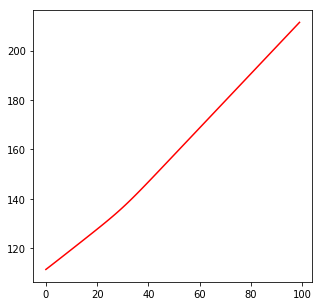

test accuracy  67.80678067806781


In [201]:
clase=10
y_train=oneHot(y_train,clase)
y_test=oneHot(y_test,clase)
    
x_train=x_train/255
x_test=x_test/255
    
x_train=extra_col(x_train)
x_test=extra_col(x_test)
    
theta,eroare,nr_it=gradient_descent(x_train,y_train,clase)

plt.figure(figsize=(5,5))
plt.plot(range(nr_it),eroare,'red')
plt.show()

h=softmax(np.dot(x_test,theta))

h=np.argmax(h,axis=1)

h=h.reshape(h.shape[0],1)

h=oneHot(h,10)

contor=0
for i in range (len(h)):
    if np.argmax(h[i])==np.argmax(y_test[i]):
        contor+=1
        
print("test accuracy ",100*contor/len(y_test))